In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
for dirname, _, filenames in os.walk('./data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./data/reservations.csv
./data/reservations (1).csv
./data/reservations (2).csv
./data/airbnb-dummy-data-full.csv


## AirBnB Analysis Guide
1. From the host panel in the Desktop application, click 'Earnings'
2. Click 'View All Paid'
3. Click 'Get CSV Report'
4. For full functionality, do not tick off anything and instead Select All.

### Notes for the application proper
- Cache the dataset
- Ensure all the values are accounted for accordingly
- Do not send anything online; all locally-hosted
- Possible to rebuild the app three times (Streamlit, Django, Full-stack)

In [5]:
import os

bnb_df = pd.read_csv('./data/airbnb-dummy-data-full.csv', parse_dates=['Date', 'Arriving by date', 'Booking date', 'Start date', 'Earnings year'])
bnb_df['Earnings year'] = bnb_df['Earnings year'].dt.year

/var/folders/lf/hjjhjjj56lg0h0g75hbq_qb00000gp/T/ipykernel_20606/709398738.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  bnb_df = pd.read_csv('./data/airbnb-dummy-data-full.csv', parse_dates=['Date', 'Arriving by date', 'Booking date', 'Start date', 'Earnings year'])
/var/folders/lf/hjjhjjj56lg0h0g75hbq_qb00000gp/T/ipykernel_20606/709398738.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  bnb_df = pd.read_csv('./data/airbnb-dummy-data-full.csv', parse_dates=['Date', 'Arriving by date', 'Booking date', 'Start date', 'Earnings year'])
/var/folders/lf/hjjhjjj56lg0h0g75hbq_qb00000gp/T/ipykernel_20606/709398738.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling b

In [6]:
bnb_df

,Date,Arriving by date,Type,Confirmation code,Booking date,Start date,End date,Nights,Guest,Listing,...,Reference code,Currency,Amount,Paid out,Service fee,Fast pay fee,Cleaning fee,Gross earnings,Occupancy taxes,Earnings year
0,2023-12-15,2023-12-15,Reservation,HMKP9Q2R,2023-12-01,2023-12-16,12/30/23,14.0,Maria Garcia,Cozy Studio in Makati,...,rt45mp9kl2,PHP,15800,NaN,2370.0,158.0,1500.0,17300.0,1896.0,2023
1,2023-12-20,NaT,Payout,NaN,NaT,NaT,NaN,NaN,NaN,NaN,...,xy78nq3wv4,PHP,-1200,4500.0,NaN,NaN,NaN,NaN,NaN,2023
2,2023-12-25,NaT,Resolution Adjustment,NaN,NaT,NaT,NaN,NaN,NaN,NaN,...,ab12cd34ef,PHP,-500,NaN,NaN,NaN,NaN,NaN,NaN,2023
3,2023-12-28,2023-12-28,Reservation,HMRS5T8W,2023-12-15,2023-12-29,1/10/24,12.0,John Smith,Luxury Condo with City View,...,gh56jk78lm,PHP,18000,NaN,2700.0,180.0,1800.0,19800.0,2160.0,2023
4,2023-12-30,NaT,Resolution Payout,NaN,NaT,NaT,NaN,NaN,NaN,NaN,...,mn90pq12rs,PHP,800,NaN,NaN,NaN,NaN,NaN,NaN,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,2024-04-30,NaT,Resolution Adjustment,NaN,NaT,NaT,NaN,NaN,NaN,NaN,...,uda77rst9s,PHP,-1340,NaN,NaN,NaN,NaN,NaN,NaN,2024
98,2024-12-26,NaT,Payout,NaN,NaT,NaT,NaN,NaN,NaN,NaN,...,37qdpey3qof,PHP,1593,2136.0,NaN,NaN,NaN,NaN,NaN,2024
99,2024-07-10,NaT,Resolution Payout,NaN,NaT,NaT,NaN,NaN,NaN,NaN,...,v4pwhxji57,PHP,1356,NaN,NaN,NaN,NaN,NaN,NaN,2024
100,2024-10-30,2024-10-30,Reservation,HM6PWFBU,2024-10-07,2024-10-31,11/18/24,18.0,Sarah Johnson,Cozy Studio in Makati,...,5njz7tiquiu,PHP,14322,NaN,2148.0,143.0,1115.0,15437.0,1719.0,2024


In [7]:
bnb_df['Details'].unique()

array([nan, 'Transfer to Bank Account (PHP)'], dtype=object)

In [8]:
reservations_bnb = bnb_df[bnb_df['Type'] == 'Reservation']
reservations_bnb

,Date,Arriving by date,Type,Confirmation code,Booking date,Start date,End date,Nights,Guest,Listing,...,Reference code,Currency,Amount,Paid out,Service fee,Fast pay fee,Cleaning fee,Gross earnings,Occupancy taxes,Earnings year
0,2023-12-15,2023-12-15,Reservation,HMKP9Q2R,2023-12-01,2023-12-16,12/30/23,14.0,Maria Garcia,Cozy Studio in Makati,...,rt45mp9kl2,PHP,15800,NaN,2370.0,158.0,1500.0,17300.0,1896.0,2023
3,2023-12-28,2023-12-28,Reservation,HMRS5T8W,2023-12-15,2023-12-29,1/10/24,12.0,John Smith,Luxury Condo with City View,...,gh56jk78lm,PHP,18000,NaN,2700.0,180.0,1800.0,19800.0,2160.0,2023
5,2024-01-05,2024-01-05,Reservation,HM1A2B3C,2023-12-20,2024-01-06,1/15/24,9.0,David Kim,Modern 2BR Apartment,...,tu34vw56xy,PHP,12000,NaN,1800.0,120.0,1400.0,13400.0,1440.0,2024
7,2024-02-15,2024-02-15,Reservation,HM4D5E6F,2024-02-01,2024-02-16,2/25/24,9.0,Sarah Johnson,Beachfront Villa,...,ef23gh45ij,PHP,16500,NaN,2475.0,165.0,1600.0,18100.0,1980.0,2024
9,2024-04-10,2024-04-10,Reservation,HM7G8H9I,2024-03-25,2024-04-11,4/20/24,9.0,Mohammed Ahmed,Peaceful Garden House,...,qr12st34uv,PHP,13500,NaN,2025.0,135.0,1450.0,14950.0,1620.0,2024
11,2024-06-20,2024-06-20,Reservation,HMJ1K2L3,2024-06-05,2024-06-21,6/30/24,9.0,Lisa Chen,Downtown Loft,...,cd90ef12gh,PHP,14800,NaN,2220.0,148.0,1550.0,16350.0,1776.0,2024
13,2024-08-30,2024-08-30,Reservation,HM4M5N6P,2024-08-15,2024-08-31,9/10/24,10.0,Robert Taylor,Cozy Studio in Makati,...,op78qr90st,PHP,17200,NaN,2580.0,172.0,1700.0,18900.0,2064.0,2024
15,2024-10-20,2024-10-20,Reservation,HM7Q8R9S,2024-10-05,2024-10-21,11/5/24,15.0,Emma Wilson,Luxury Condo with City View,...,ab56cd78ef,PHP,19500,NaN,2925.0,195.0,1850.0,21350.0,2340.0,2024
17,2024-12-20,2024-12-20,Reservation,HMT1U2V3,2024-12-05,2024-12-21,1/5/25,15.0,James Brown,Modern 2BR Apartment,...,mn34op56qr,PHP,20000,NaN,3000.0,200.0,1900.0,21900.0,2400.0,2024
19,2025-01-10,2025-01-10,Reservation,HM4W5X6Y,2024-12-25,2025-01-11,1/25/25,14.0,Sofia Rodriguez,Beachfront Villa,...,yz12ab34cd,PHP,21000,NaN,3150.0,210.0,2000.0,23000.0,2520.0,2025


In [9]:
reservations_bnb.columns

Index(['Date', 'Arriving by date', 'Type', 'Confirmation code', 'Booking date',
       'Start date', 'End date', 'Nights', 'Guest', 'Listing', 'Details',
       'Reference code', 'Currency', 'Amount', 'Paid out', 'Service fee',
       'Fast pay fee', 'Cleaning fee', 'Gross earnings', 'Occupancy taxes',
       'Earnings year'],
      dtype='object')

In [10]:
grouped_units = reservations_bnb[['Listing', 'Nights', 'Amount', 'Guest']].groupby(by="Listing").agg({
    'Nights': ['sum', 'mean', 'max'],
    'Amount': ['sum', 'mean', 'max'],
    'Guest': ['nunique', 'count']
})
grouped_units

Nights                   Amount                \
                               sum       mean   max     sum          mean   
Listing                                                                     
Beachfront Villa              34.0   8.500000  14.0   65581  16395.250000   
Cozy Studio in Makati        101.0  12.625000  21.0  104248  13031.000000   
Downtown Loft                 78.0  13.000000  24.0   78908  13151.333333   
Luxury Condo with City View   62.0  10.333333  16.0   72049  12008.166667   
Modern 2BR Apartment          44.0  11.000000  15.0   51924  12981.000000   
Peaceful Garden House         41.0  13.666667  17.0   42422  14140.666667   

                                     Guest        
                               max nunique count  
Listing                                           
Beachfront Villa             21000       3     4  
Cozy Studio in Makati        17212       5     8  
Downtown Loft                19800       6     6  
Luxury Condo with City View  19500       3     6  
Modern 2BR Apartment         20000       4     4  
Peaceful Garden House        18500       1     3

In [11]:
reservations_bnb.describe()

,Date,Arriving by date,Booking date,Start date,Nights,Amount,Paid out,Service fee,Fast pay fee,Cleaning fee,Gross earnings,Occupancy taxes,Earnings year
count,31,31,31,31,31.000000,31.000000,0.0,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,2024-07-15 07:44:30.967741952,2024-07-15 07:44:30.967741952,2024-06-29 06:11:36.774193664,2024-07-16 07:44:30.967741952,11.612903,13391.354839,NaN,2008.741935,133.935484,1537.419355,14928.774194,1606.903226,2024.032258
min,2023-12-15 00:00:00,2023-12-15 00:00:00,2023-12-01 00:00:00,2023-12-16 00:00:00,1.000000,5070.000000,NaN,761.000000,51.000000,1000.000000,6146.000000,608.000000,2023.000000
25%,2024-03-06 12:00:00,2024-03-06 12:00:00,2024-02-20 00:00:00,2024-03-07 12:00:00,8.500000,10012.000000,NaN,1501.500000,100.000000,1425.000000,11699.000000,1201.500000,2024.000000
50%,2024-08-09 00:00:00,2024-08-09 00:00:00,2024-07-28 00:00:00,2024-08-10 00:00:00,11.000000,14322.000000,NaN,2148.000000,143.000000,1569.000000,15541.000000,1719.000000,2024.000000
75%,2024-10-25 00:00:00,2024-10-25 00:00:00,2024-10-06 00:00:00,2024-10-26 00:00:00,15.000000,17206.000000,NaN,2581.000000,172.000000,1725.000000,18784.500000,2064.500000,2024.000000
max,2025-02-05 00:00:00,2025-02-05 00:00:00,2025-01-20 00:00:00,2025-02-06 00:00:00,24.000000,21000.000000,NaN,3150.000000,210.000000,2000.000000,23000.000000,2520.000000,2025.000000
std,NaN,NaN,NaN,NaN,5.760078,4997.371980,NaN,749.571521,49.955938,277.500363,5105.400753,599.689106,0.406929


In [12]:
display(len(reservations_bnb))

31

In [13]:
# Repeat Guests?
repeat_counts = reservations_bnb['Guest'].value_counts()
repeat_counts = repeat_counts[repeat_counts > 1].index
reservations_bnb_repeat = reservations_bnb[reservations_bnb['Guest'].isin(repeat_counts)]
reservations_bnb_repeat

,Date,Arriving by date,Type,Confirmation code,Booking date,Start date,End date,Nights,Guest,Listing,...,Reference code,Currency,Amount,Paid out,Service fee,Fast pay fee,Cleaning fee,Gross earnings,Occupancy taxes,Earnings year
0,2023-12-15,2023-12-15,Reservation,HMKP9Q2R,2023-12-01,2023-12-16,12/30/23,14.0,Maria Garcia,Cozy Studio in Makati,...,rt45mp9kl2,PHP,15800,NaN,2370.0,158.0,1500.0,17300.0,1896.0,2023
3,2023-12-28,2023-12-28,Reservation,HMRS5T8W,2023-12-15,2023-12-29,1/10/24,12.0,John Smith,Luxury Condo with City View,...,gh56jk78lm,PHP,18000,NaN,2700.0,180.0,1800.0,19800.0,2160.0,2023
7,2024-02-15,2024-02-15,Reservation,HM4D5E6F,2024-02-01,2024-02-16,2/25/24,9.0,Sarah Johnson,Beachfront Villa,...,ef23gh45ij,PHP,16500,NaN,2475.0,165.0,1600.0,18100.0,1980.0,2024
9,2024-04-10,2024-04-10,Reservation,HM7G8H9I,2024-03-25,2024-04-11,4/20/24,9.0,Mohammed Ahmed,Peaceful Garden House,...,qr12st34uv,PHP,13500,NaN,2025.0,135.0,1450.0,14950.0,1620.0,2024
11,2024-06-20,2024-06-20,Reservation,HMJ1K2L3,2024-06-05,2024-06-21,6/30/24,9.0,Lisa Chen,Downtown Loft,...,cd90ef12gh,PHP,14800,NaN,2220.0,148.0,1550.0,16350.0,1776.0,2024
13,2024-08-30,2024-08-30,Reservation,HM4M5N6P,2024-08-15,2024-08-31,9/10/24,10.0,Robert Taylor,Cozy Studio in Makati,...,op78qr90st,PHP,17200,NaN,2580.0,172.0,1700.0,18900.0,2064.0,2024
15,2024-10-20,2024-10-20,Reservation,HM7Q8R9S,2024-10-05,2024-10-21,11/5/24,15.0,Emma Wilson,Luxury Condo with City View,...,ab56cd78ef,PHP,19500,NaN,2925.0,195.0,1850.0,21350.0,2340.0,2024
17,2024-12-20,2024-12-20,Reservation,HMT1U2V3,2024-12-05,2024-12-21,1/5/25,15.0,James Brown,Modern 2BR Apartment,...,mn34op56qr,PHP,20000,NaN,3000.0,200.0,1900.0,21900.0,2400.0,2024
19,2025-01-10,2025-01-10,Reservation,HM4W5X6Y,2024-12-25,2025-01-11,1/25/25,14.0,Sofia Rodriguez,Beachfront Villa,...,yz12ab34cd,PHP,21000,NaN,3150.0,210.0,2000.0,23000.0,2520.0,2025
22,2025-01-25,2025-01-25,Reservation,HM7Z8A9B,2025-01-10,2025-01-26,2/10/25,15.0,Mohammed Ahmed,Peaceful Garden House,...,qr34st56uv,PHP,18500,NaN,2775.0,185.0,1750.0,20250.0,2220.0,2025


In [14]:
# chart for repeat guests
grouped_repeats = reservations_bnb_repeat.groupby('Guest').agg({
    'Gross earnings': ['sum', 'mean'],
    'Confirmation code': 'count',
    'Nights': 'sum'
})
grouped_repeats_df = grouped_repeats.reset_index()
grouped_repeats_df

Guest Gross earnings               Confirmation code Nights
                              sum          mean             count    sum
0      Emma Wilson        37097.0  18548.500000                 2   20.0
1      James Brown        33368.0  16684.000000                 2   16.0
2       John Smith        54889.0  10977.800000                 5   64.0
3        Lisa Chen        97646.0  13949.428571                 7   66.0
4     Maria Garcia        38980.0  19490.000000                 2   28.0
5   Mohammed Ahmed        47130.0  15710.000000                 3   41.0
6    Robert Taylor        38340.0  12780.000000                 3   38.0
7    Sarah Johnson        60724.0  15181.000000                 4   55.0
8  Sofia Rodriguez        41218.0  20609.000000                 2   23.0

In [15]:
grouped_repeats_df.columns

MultiIndex([(            'Guest',      ''),
            (   'Gross earnings',   'sum'),
            (   'Gross earnings',  'mean'),
            ('Confirmation code', 'count'),
            (           'Nights',   'sum')],
           )

In [16]:
grouped_repeats_df.columns = ['_'.join(col).strip('_') for col in grouped_repeats_df.columns.values]
grouped_repeats_df

,Guest,Gross earnings_sum,Gross earnings_mean,Confirmation code_count,Nights_sum
0,Emma Wilson,37097.0,18548.500000,2,20.0
1,James Brown,33368.0,16684.000000,2,16.0
2,John Smith,54889.0,10977.800000,5,64.0
3,Lisa Chen,97646.0,13949.428571,7,66.0
4,Maria Garcia,38980.0,19490.000000,2,28.0
5,Mohammed Ahmed,47130.0,15710.000000,3,41.0
6,Robert Taylor,38340.0,12780.000000,3,38.0
7,Sarah Johnson,60724.0,15181.000000,4,55.0
8,Sofia Rodriguez,41218.0,20609.000000,2,23.0


In [17]:
custom_names = {
    'Gross earnings_sum': 'total_earnings',
    'Gross earnings_mean': 'avg_earnings',
    'Confirmation code_count': 'count',
    'Nights_sum': 'total_nights'
}
renamed_grouped_repeats_df = grouped_repeats_df.rename(columns=custom_names)
renamed_grouped_repeats_df

,Guest,total_earnings,avg_earnings,count,total_nights
0,Emma Wilson,37097.0,18548.500000,2,20.0
1,James Brown,33368.0,16684.000000,2,16.0
2,John Smith,54889.0,10977.800000,5,64.0
3,Lisa Chen,97646.0,13949.428571,7,66.0
4,Maria Garcia,38980.0,19490.000000,2,28.0
5,Mohammed Ahmed,47130.0,15710.000000,3,41.0
6,Robert Taylor,38340.0,12780.000000,3,38.0
7,Sarah Johnson,60724.0,15181.000000,4,55.0
8,Sofia Rodriguez,41218.0,20609.000000,2,23.0


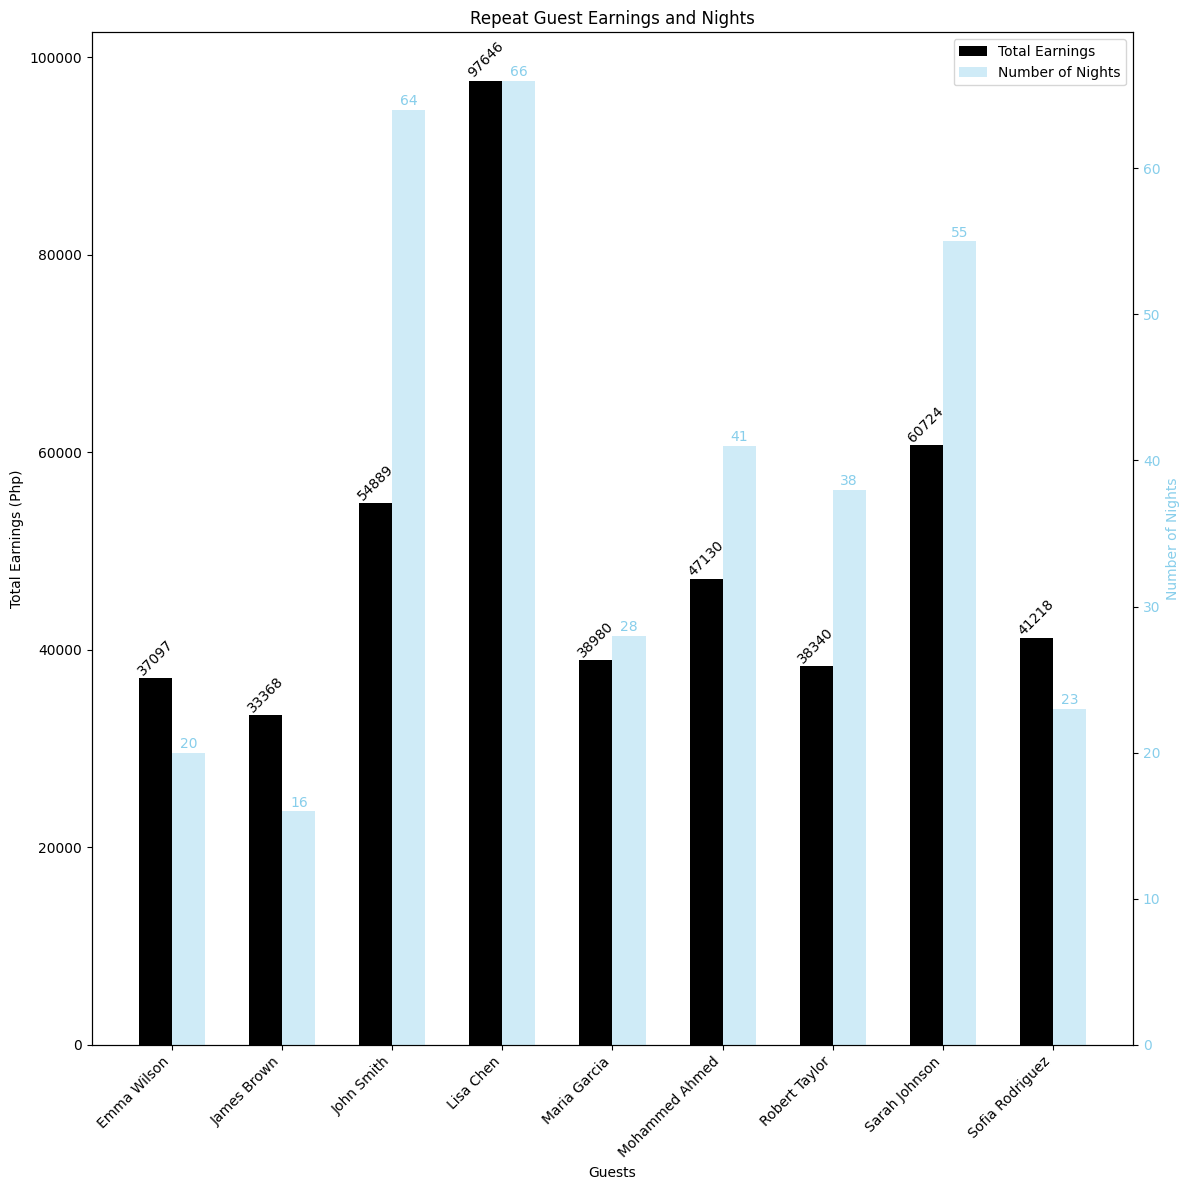

In [18]:
fig, ax1 = plt.subplots(figsize=(12,12))

# Set bar width and positions
bar_width = 0.3
x = np.arange(len(renamed_grouped_repeats_df['Guest']))

# Create the first axis for earnings
color1 = 'black'
ax1.bar(x - bar_width/2, renamed_grouped_repeats_df['total_earnings'], 
        width=bar_width, color=color1, label='Total Earnings')
ax1.set_xlabel('Guests')
ax1.set_ylabel('Total Earnings (Php)', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)

# Set x-ticks and rotate labels
ax1.set_xticks(x)
ax1.set_xticklabels(renamed_grouped_repeats_df['Guest'], rotation=45, ha='right')

# Create the second axis for nights
ax2 = ax1.twinx()
color2 = 'skyblue'
ax2.bar(x + bar_width/2, renamed_grouped_repeats_df['total_nights'], 
        width=bar_width, color=color2, alpha=0.4, label='Number of Nights')
ax2.set_ylabel('Number of Nights', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

# Add value labels on top of bars
for i, v in enumerate(renamed_grouped_repeats_df['total_earnings']):
    ax1.text(i - bar_width/2, v + 1, f'{v:.0f}', ha='center', va='bottom', color=color1, rotation=45)
for i, v in enumerate(renamed_grouped_repeats_df['total_nights']):
    ax2.text(i + bar_width/2, v + 0.1, str(int(v)), ha='center', va='bottom', color=color2)

# Add title and adjust legend
plt.title('Repeat Guest Earnings and Nights')
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.tight_layout()
plt.show()

# Analyze room behavior and days from booking
- Now that we have the data from ...

In [19]:
def get_booking_to_date(df: pd.DataFrame, per_room: bool = False):
    time_diff = df['Start date'] - df['Booking date']
    df['booking_to_date'] = time_diff / pd.Timedelta('1 days')
    return df
reservations_bnb = get_booking_to_date(bnb_df)
reservations_bnb[['Booking date', 'Guest', 'booking_to_date']].sort_values(by=['booking_to_date'], ascending=False).dropna(axis=0)

,Booking date,Guest,booking_to_date
88,2024-02-21,Mohammed Ahmed,31.0
52,2024-03-25,Sarah Johnson,30.0
96,2024-09-04,Robert Taylor,30.0
64,2024-07-30,Lisa Chen,26.0
82,2024-01-13,Lisa Chen,26.0
92,2023-12-30,Sarah Johnson,25.0
100,2024-10-07,Sarah Johnson,24.0
59,2024-05-01,Emma Wilson,23.0
51,2024-12-08,Lisa Chen,21.0
38,2024-06-15,Lisa Chen,18.0


Text(0.5, 1.0, 'Booking-to-date probability distribution')

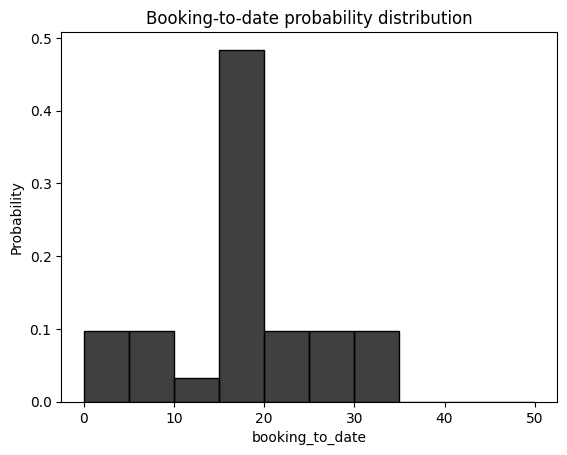

In [20]:
sns.histplot(reservations_bnb['booking_to_date'], stat='probability', bins=[0,5,10,15,20,25,30,35,40,45,50], color='black')
plt.title('Booking-to-date probability distribution')

Text(0.5, 1.0, 'Nights Reserved Distribution')

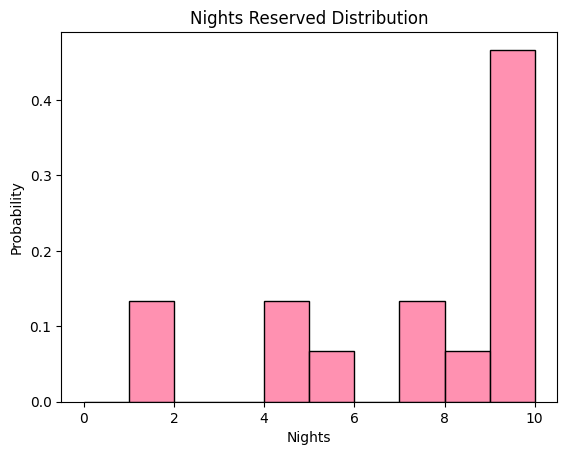

In [21]:
# Get night frequency
nights_series = reservations_bnb['Nights']
sns.histplot(nights_series, stat='probability', bins=[0,1,2,3,4,5,6,7,8,9,10], color='#FF6C97')
plt.title('Nights Reserved Distribution')

In [22]:
# Rename MultiIndex
new_col_names = [x[0] + '_' + x[1] for x in grouped_units.columns]
grouped_units.columns = new_col_names
grouped_units = grouped_units.reset_index()
grouped_units

,Listing,Nights_sum,Nights_mean,Nights_max,Amount_sum,Amount_mean,Amount_max,Guest_nunique,Guest_count
0,Beachfront Villa,34.0,8.500000,14.0,65581,16395.250000,21000,3,4
1,Cozy Studio in Makati,101.0,12.625000,21.0,104248,13031.000000,17212,5,8
2,Downtown Loft,78.0,13.000000,24.0,78908,13151.333333,19800,6,6
3,Luxury Condo with City View,62.0,10.333333,16.0,72049,12008.166667,19500,3,6
4,Modern 2BR Apartment,44.0,11.000000,15.0,51924,12981.000000,20000,4,4
5,Peaceful Garden House,41.0,13.666667,17.0,42422,14140.666667,18500,1,3


### Targets of this EDA
- Convert the aforementioned codes into the appropriate functions
- Extend the analysis found in a regular AirBnB report
- Explore implementing as a Streamlit app first, then recreate in Django, and then in JavaScript

In [23]:
import warnings
# Class: AirBnB
# assume all pertinent columns have been converted into their datetime equivalent

class AirBnB:
    def __init__(self, df: pd.DataFrame):
        """Initialize AirBnB class with a DataFrame"""
        if not isinstance(df, pd.DataFrame):
            raise TypeError("Input must be a pandas DataFrame")
        
        self.df = df
        self.filtered_df = None
        self.length = len(df)
        self.columns = df.columns

    def filter_type(self, type_value: str = None) -> pd.DataFrame:
        '''Filter based on values available in the Type column.
        
        Args:
            type_value (str): type value to filter by

        Returns:
            pd.DataFrame: filtered DataFrame

        Raises:
            ValueError: if type_value is invalid or not foudn in the DataFrame
        '''
        
        try:
            df = self.filtered_df if self.filtered_df is not None else self.df
            
            if type_value is None:
                raise ValueError("Type value cannot be None")
                
            if type_value not in df['Type'].unique():
                raise ValueError(f"Type '{type_value}' not found in available types: {df['Type'].unique().tolist()}")
                
            self.filtered_df = df[df['Type'] == type_value]
            return self.filtered_df
            
        except ValueError as v:
            print(f"Error: {str(v)}")
            return df  # Return original DataFrame on error
            
        except Exception as e:
            print(f"Unexpected error getting reservations: {str(e)}")
            return df  # Return original DataFrame on error


    def update_fiscal_year(self, fiscal_year: int | None = None) -> pd.DataFrame:
        try:
            if self.filtered_df is None:
                df = self.df
            else:
                df = self.filtered_df
                
            if fiscal_year is None:
                raise ValueError("Fiscal year cannot be None")

            if fiscal_year not in df['Earnings year'].unique():
                raise ValueError(f"No data found for fiscal year {fiscal_year}")
                
            self.filtered_df = df[df['Earnings year'] == fiscal_year]
            return self.filtered_Df
        except ValueError as v:
            print("No valid fiscal year found.")
        except Exception as e:
            print(e)

    # def get_unit_data(self):
    #     '''
    #         This method returns a df where the information is grouped according to unit data.
    #     '''
        
    #     try:

    #     except Exception as e:
            
    #     if self.fiscal_year

# reservations_bnb = bnb_df[bnb_df['Type'] == 'Reservation']
# reservations_bnb